In [1]:
import requests

API_KEY = "36167ffe7105c7f0ef37732bdbeeeafe"   # mete a tua key API-Football
BASE = "https://v3.football.api-sports.io"

def get_players_portugal():
    league_id = 94   # Primeira Liga
    season = 2023

    headers = {
        "x-apisports-key": API_KEY
    }

    players = []
    page = 1

    while True:
        url = f"{BASE}/players"
        params = {
            "league": league_id,
            "season": season,
            "page": page
        }
        r = requests.get(url, headers=headers, params=params)
        r.raise_for_status()
        data = r.json()

        # Adiciona jogadores
        players.extend(data.get("response", []))

        # paginação
        paging = data.get("paging", {})
        if paging.get("total", 1) <= page:
            break

        page += 1

    return players

players = get_players_portugal()


In [2]:
from rdflib import Graph, URIRef, Literal, RDF

grafo = Graph()

league_id = "Liga de Portugal"      # Primeira Liga
season_year = 2023    # A season que estás a usar na API-Football

for p in players:
    player = p["player"]["name"]
    age = p["player"]["age"]
    team = p["statistics"][0]["team"]["name"]
    position = p["statistics"][0]["games"]["position"]
    nationality = p["player"]["nationality"]

        # === Tipos ===
    grafo.add((Literal(player), Literal("has age"), Literal(age)))
    grafo.add((Literal(player), Literal("plays in"), Literal(team)))
    grafo.add((Literal(player), Literal("has position"), Literal(position)))
    grafo.add((Literal(team), Literal("participates in"), Literal(league_id)))
    grafo.add((Literal(player), Literal("has nationality"), Literal(nationality)))

print(grafo.__len__())
    

256


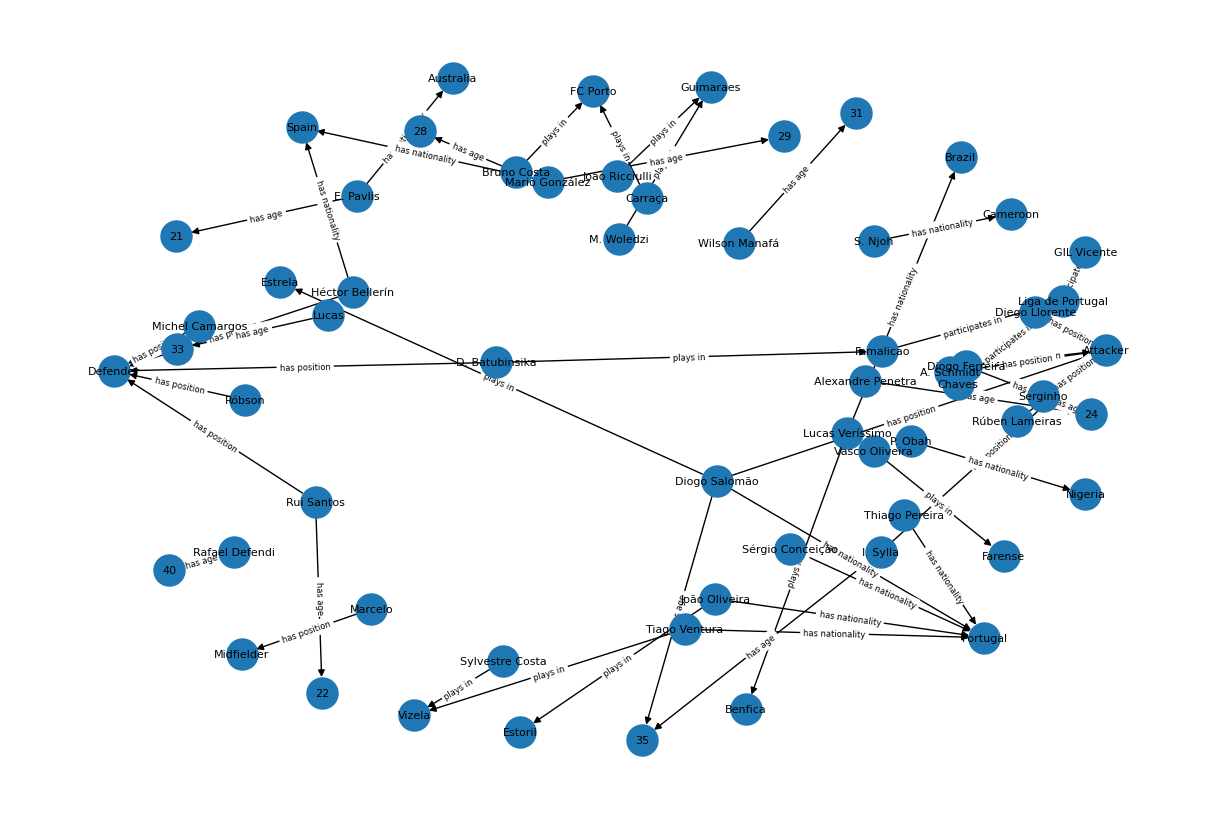

In [3]:
import networkx as nx
subgraph = list(grafo)[:50]  # 50 triplas
import matplotlib.pyplot as plt

# Converter o RDFLib Graph para NetworkX
G = nx.DiGraph()

for s, p, o in subgraph:
    G.add_edge(str(s), str(o), label=str(p))
    

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(s, o): p for s, o, p in G.edges(data='label')}, font_size=6)
plt.show()

In [4]:
import spacy
from langdetect import detect

# Carregar modelo de português
nlp_pt = spacy.load("pt_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")


OSError: [E050] Can't find model 'pt_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
def analise(text,graph):
    idioma = detect(text)
    print("Idioma detectado:", idioma)

    if idioma == "pt":
        doc = nlp_pt(text)
    else:
        doc = nlp_en(text)

    palavras_distintas = []
    for token in doc:
        if token.text not in palavras_distintas:
            palavras_distintas.append(token.text)

    print("Palavras distintas:", palavras_distintas)
    entities = list()
    grupos = {}
    for token in doc:
        pos = token.pos_
        if pos not in grupos:
            grupos[pos] = set()  # set para evitar duplicados
        grupos[pos].add(token.text)

    # Converter sets para listas
    grupos = {pos: list(palavras) for pos, palavras in grupos.items()}

    print("\nPalavras agrupadas por grupo:")
    for pos, palavras in grupos.items():
        print(f"{pos}: {palavras}")
        for palavra in palavras:
            if palavra in graph.nodes:
                print(f" → A palavra '{palavra}' EXISTE.")
                entities.append(palavra)
            else:
                print(f" → A palavra '{palavra}' NÃO EXISTE.")
    print("\nEntidades:")
    for entity in doc.ents:
        print(entity.text, entity.label_)
        if entity.text in graph.nodes:
            print(f" → A entidade '{entity.text}' EXISTE.")
            entities.append(entity.text)
        else:
            print(f" → A entidade '{entity.text}' NÃO EXISTE.")
    return entities

In [ ]:
entities = set()

In [ ]:
text = input("Insira texto:")
while text!="exit":
    entities.update(analise(text,G))
    text = input("Insira texto:")

Idioma detectado: nl
Palavras distintas: ['Joe_Biden', 'lives', 'in', 'Belarus']

Palavras agrupadas por grupo:
PROPN: ['Belarus', 'Joe_Biden']
 → A palavra 'Belarus' EXISTE.
 → A palavra 'Joe_Biden' EXISTE.
VERB: ['lives']
 → A palavra 'lives' NÃO EXISTE.
ADP: ['in']
 → A palavra 'in' NÃO EXISTE.

Entidades:
Belarus GPE
 → A entidade 'Belarus' EXISTE.
